# 지도학습(2) - 회귀분석

단순선형 회귀 분석으로 농어의 길이를 가지고 무게를 예측하는 모델을 만들어 보자


## #01. 작업준비

### 패키지 설치하기

In [33]:
import seaborn as sb
from pandas import read_excel
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 데이터 가져오기

In [46]:
origin = read_excel("https://data.hossam.kr/F02/fish.xlsx")
origin.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


#### 그래프 한글 설정

In [47]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.unicode_minus'] = False

## #02. 데이터 전처리

### 훈련데이터와 검증데이터 분할

- train data / 훈련데이터 : 모델을 생성하는데 사용되는 데이터
- test data / 검증데이터 : 모델이 얼마나 잘 만들어졌는지 확인하는 용도


#### 데이터 프레임을 통째로 넣는 경우

데이터 프레임에 독립변수와 종속변수를 모두 포함되어 있는 형태

같은 유형으로 7:3으로 분할된 두 개의 데이터 프레임이 반환된다. 


In [48]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [49]:
# test_size = 0.3 과 train_size = 0.7은 의미가 같다.
train, test = train_test_split(origin, test_size= 0.3, random_state=777)

In [50]:
train.head()

,길이,무게
8,19.6,85.0
0,8.4,5.9
15,22.0,120.0
26,24.6,188.0
51,42.0,1100.0


In [51]:
test.head()

,길이,무게
16,22.0,130.0
12,21.0,125.0
21,22.7,145.0
33,27.5,250.0
36,30.0,320.0


#### 데이터 프레임을 독립변수와 종속변수로 분리하여 사용하는 경우

독립변수를 7:3으로 분할한 형태와 종속변수를 7:3으로 분할한 형태가 반환된다.

총 4개의 데이터프레임이 리턴된다.

In [52]:
# 독립변수, 종속변수 분리
x_data = origin[['길이']]
y_data = origin[['무게']]

In [53]:
# 독립변수, 종속변수 각각 7:3으로 쪼개짐 => 훈련 / 검증 독립변수, 종속변수 (총 4개 분할)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

In [54]:
x_train

,길이
8,19.6
0,8.4
15,22.0
26,24.6
51,42.0
2,15.0
6,18.7
4,17.4
42,37.0
30,27.3


In [55]:
x_test

,길이
16,22.0
12,21.0
21,22.7
33,27.5
36,30.0
17,22.0
11,21.0
9,20.0
35,28.7
52,43.0


In [56]:
y_train

,무게
8,85.0
0,5.9
15,120.0
26,188.0
51,1100.0
2,40.0
6,78.0
4,70.0
42,700.0
30,300.0


In [57]:
y_test

,무게
16,130.0
12,125.0
21,145.0
33,250.0
36,320.0
17,135.0
11,115.0
9,85.0
35,300.0
52,1000.0


## #03. 데이터 분석

### 선형회귀분석을 수행

In [58]:
# 1. 객체 만들기
model = LinearRegression()

# 2. 훈련데이터로 모델을 만들기~
# 분석 
fit = model.fit(x_train, y_train)

# 3. 만든 모델 확인해보기~
#기울기(계수) ,절편, 설명력
coef = fit.coef_
intercept = fit.intercept_
rscore = fit.score(x_test, y_test)

# 모델 출력해보기~
print('y = {0:.2f} * X + {1:.2f}'.format(fit.coef_[0][0], fit.intercept_[0])) 

y = 37.01 * X + -636.25


### 분석 결과 시각화

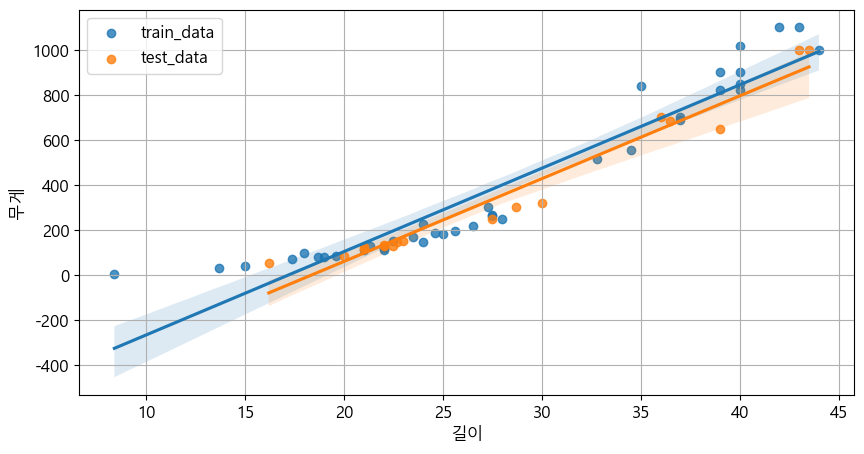

In [60]:
plt.figure(figsize=(10,5))

#원본데이터 전체
# sb.regplot(data=origin, x='길이', y = '무게')

# 학습에 사용된 데이터만으로 산젇도 그래프 그리기
sb.regplot(x=x_train, y=y_train['무게'], label= 'train_data')

# 검정데이터만으로 산젇도 그래프 그리기
sb.regplot(x=x_test, y=y_test['무게'], label= 'test_data')

plt.legend()
plt.grid()
plt.show()
plt.close()

> 91%라는 설명력에 비해 추세선으로부터 실제 데이터들이 너무 많이 떨어져 있다. (=잔차가 크다) <br> 과소적합


## #04. 과적합

### 과소적합(underfitiing) 

분석모델이 너무 단순해서 데이터의 구조를 제대로 학습하지 못할 경우 발생 <br>
(=직선모델은 너무 간단해서 복잡한 곡선문제를 학습못하는 한계가 있다.) <br>
(=학습데이터의 구조/패턴을 정확히 반영하지 못함= 모델의 성능이 떨어짐) <br>
(=모델이 너무 단순하다는 것은 "편향이 높다"를 의미 = 분산이 낮다 = 다양한 데이터셋 간에 비슷한 성능을 보여준다는 것)*편향-분산 트레이드오프* <br>

![과소적합](./res/7.png)

모델이 단순하다는 의미는 변수(피처)의 수가 부족함을 의미함

과소 = 변수가 적다

#### 해결방법
- 모델 파라미터가 더 많은 모델을 선택 (단순선형회귀 -> 다항회귀)
- 학습 알고리즘에 더 좋은 특성 제공(= 변수를 늘릴 것)

> 결국은 변수를 늘리라는 뜻


### 과대적합(overfitting) 

훈련 데이터에 있는 잡음의 양이 모델에 비해 너무 복잡한 경우 <br>
(=모델의 성능이 지나치게 향상됨) <br>
(=모델이 너무 복잡하다는 것은 "편향이 낮다"를 의미 = 분산이 높다 = 다양한 데이터셋 간에 다양한 성능을 보여준다는 것)*편향-분산 트레이드오프* <br>

설명력에 비해 잔차가 큰 경우라 할 수 있다. (= 새로운 데이터가 주어지면 정확한 예측,분류를 하지 못하게 된다.) <br>

![과대적합](./res/8.png)

과대 = 변수가 많다 <br>

#### 해결방법
- 정규화
- 파라미터 수가 적은 모델을 선택
- 훈련 데이터의 특성 수를 줄임
- 모델을 단순화 시킴

> 결국은 변수를 줄이라는 뜻

- 훈련 데이터의 잡음을 줄임

> 이상치 제거

## #05. 다항회귀(단일피쳐 다항회귀, 곡선회귀)

데이터에 잘 맞는 일차함수나 직선을 구하는 게 아니라 다항식이나 곡선을 구해서 학습하는 방법

하나의 입력 변수에 대하여 차수를 확장하여 다차원 회귀 모델을 도출한다.

![img](./res/5.png)
![img](./res/6.png)

### 데이터 전처리
#### 훈련 데이터의 독립변수 추가

In [28]:
x_train['길이^2'] = x_train['길이'] ** 2
x_train.head() 

,길이,길이^2
8,19.6,384.16
0,8.4,70.56
15,22.0,484.00
26,24.6,605.16
51,42.0,1764.00


#### 검증 데이터의 독립변수 추가

In [29]:
x_test['길이^2'] = x_test['길이'] ** 2
x_test.head() 

,길이,길이^2
16,22.0,484.00
12,21.0,441.00
21,22.7,515.29
33,27.5,756.25
36,30.0,900.00


#### 분석

In [30]:
# 객체 만들기
model = LinearRegression()

# 분석
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_) 
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력:", fit.score(x_test, y_test))

print('y = {0:.2f} * X + {1:.2f}'.format(fit.coef_[0][0], fit.intercept_[0]))


계수:  [[-23.92139238   1.06707967]]
절편:  [143.06821268]
훈련 데이터 설명력:  0.9741164053383602
검증 데이터 설명력: 0.9608757319315259
y = -23.92 * X + 143.07


#### 분석결과 시각화

7.0 46.0


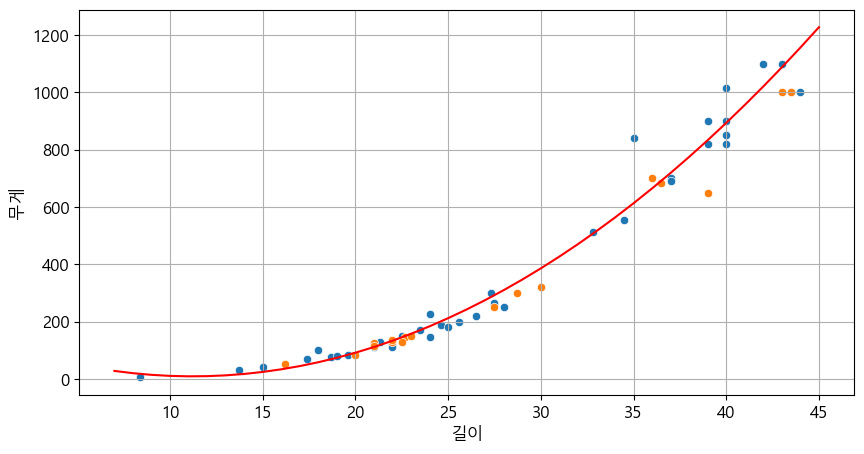

In [38]:
plt.figure(figsize=(10,5))
sb.scatterplot(x=x_train['길이'], y=y_train['무게'])

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = plt.xlim()
print(xmin.round(), xmax.round())
xrange = np.arange(xmin.round(), xmax.round(), 1)
# print(xrange)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

sb.scatterplot(x=x_test['길이'], y=y_test['무게'])
sb.lineplot(x=xrange, y=y_pred, color='red')

plt.grid()
plt.show()
plt.close()